In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filebase = "./time output/"
filelatter = "time_record"
num = ["2500", "5000", "10000", "15000", "20000"]

non_periodic = []
ghost = []
for i in range(5):
    filename = filebase + num[i] + filelatter

    core_list = []
    grid_non = []
    grid_ghost = []

    count = 1
    file = open(filename, 'r')

    tmp_list = []
    value = file.read()
    tmp_list.append((value.strip('\n')).split('\n'))
    
    core_list = tmp_list[0][:9]
    grid_non = tmp_list[0][10:19]
    grid_ghost = tmp_list[0][20:29]
        
    core = np.array(core_list, dtype=int)
    grid_n = np.array(grid_non, dtype=float)
    grid_g = np.array(grid_ghost, dtype=float)
    
    non_periodic.append(grid_n)
    ghost.append(grid_g)

# Time consuming

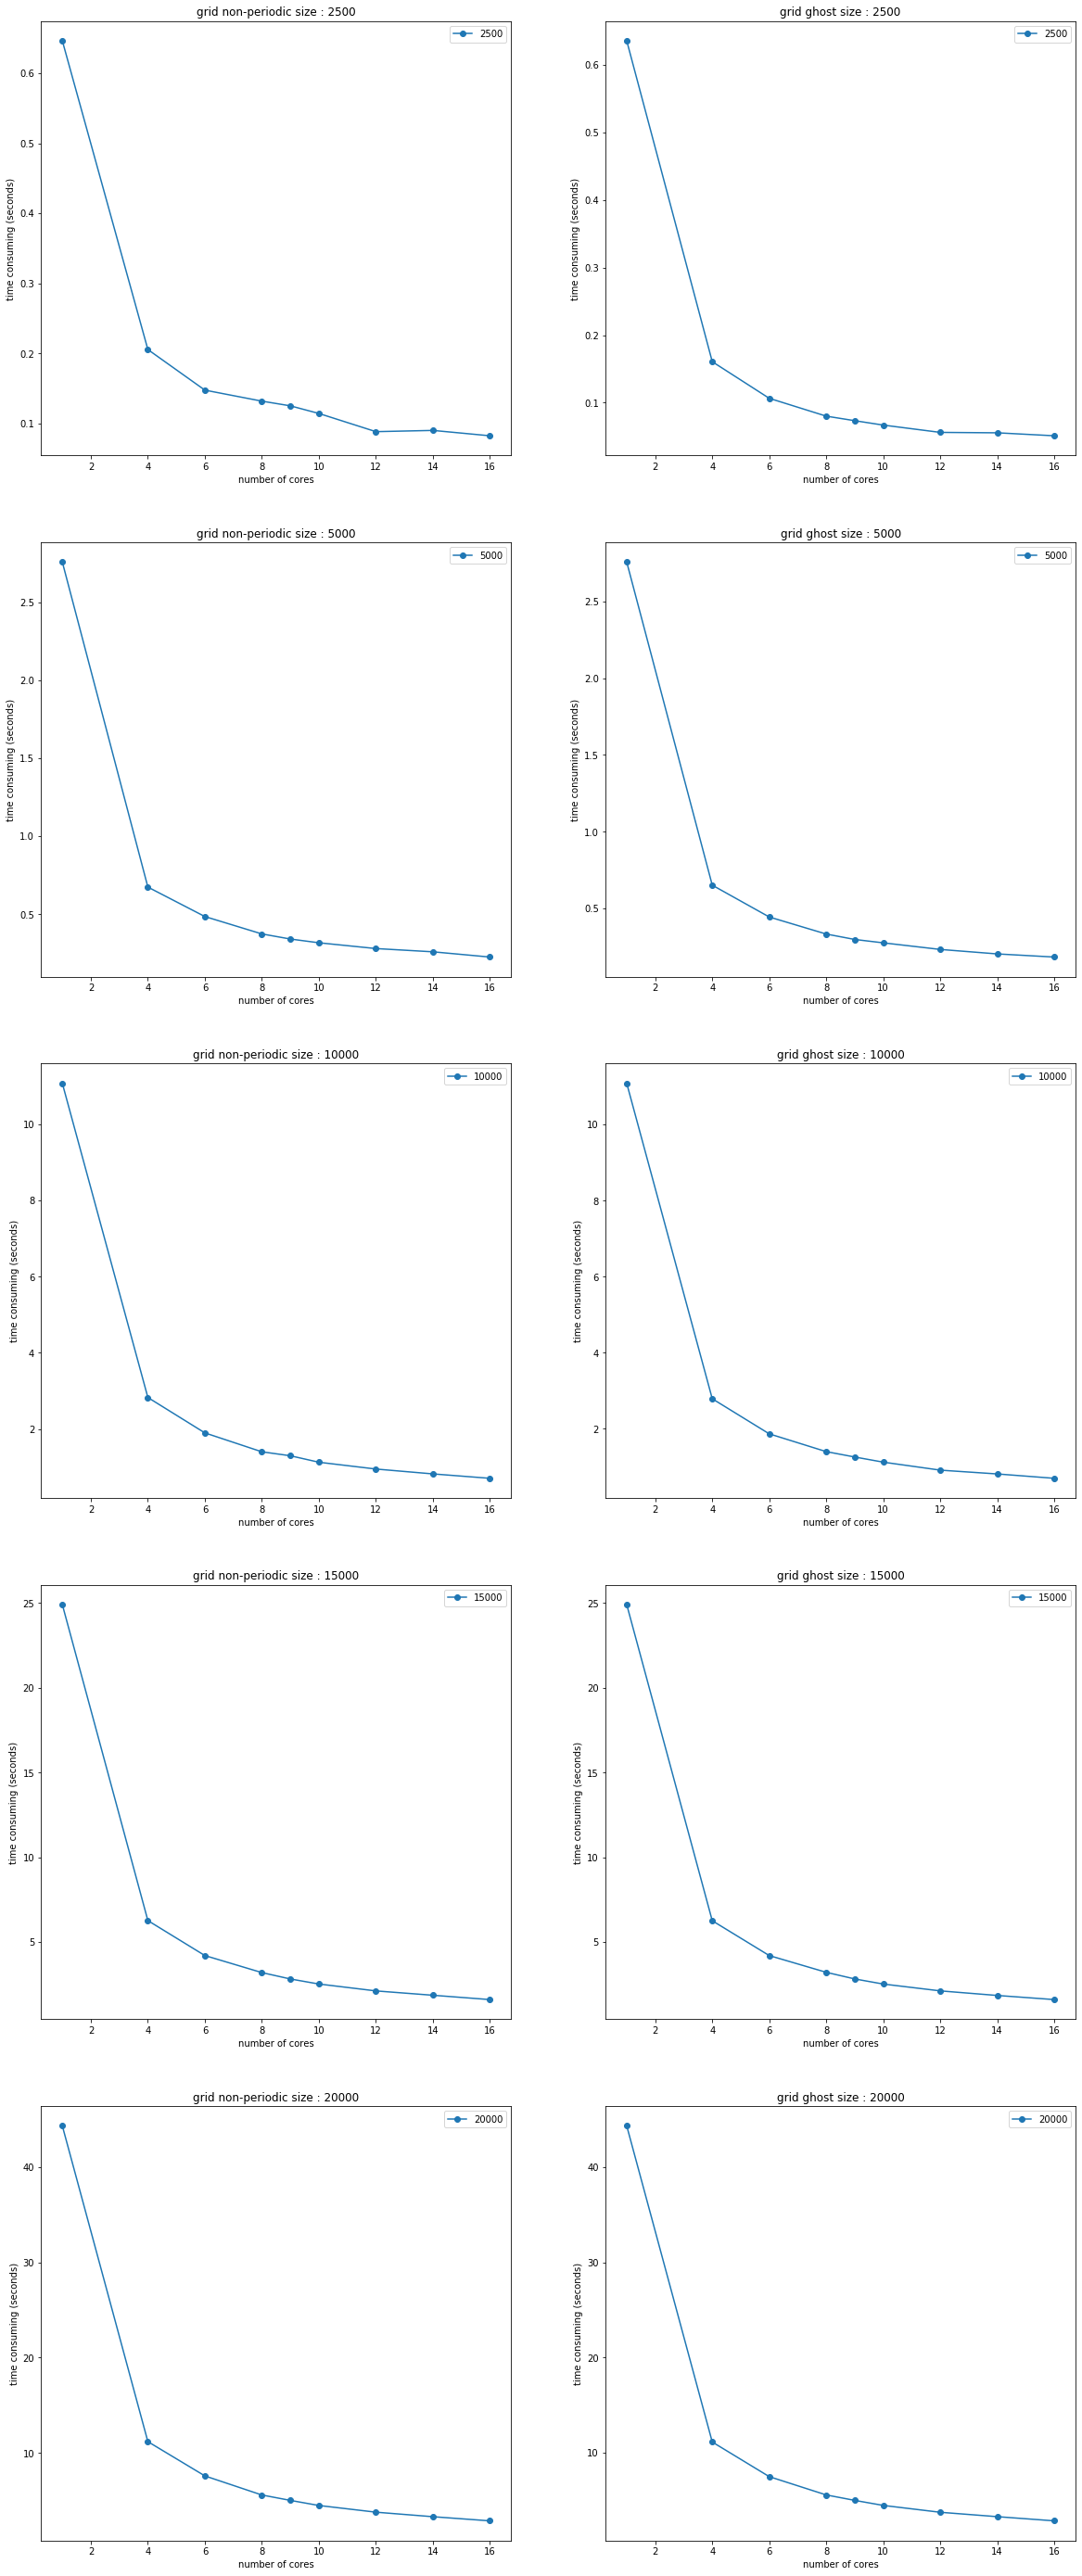

In [3]:
fig, axes = plt.subplots(5,2, figsize=(20,50))

for i in range(5):
    axes[i][0].plot(core, non_periodic[i], 'o-', label=str(num[i]))
    axes[i][0].set_title("grid non-periodic size : " + str(num[i]))
    axes[i][0].set_xlabel("number of cores")
    axes[i][0].set_ylabel("time consuming (seconds)")
    axes[i][0].legend()


    
    axes[i][1].plot(core, ghost[i], 'o-', label=str(num[i]))
    axes[i][1].set_title("grid ghost size : " + str(num[i]))
    axes[i][1].set_xlabel("number of cores")
    axes[i][1].set_ylabel("time consuming (seconds)")
    axes[i][1].legend()



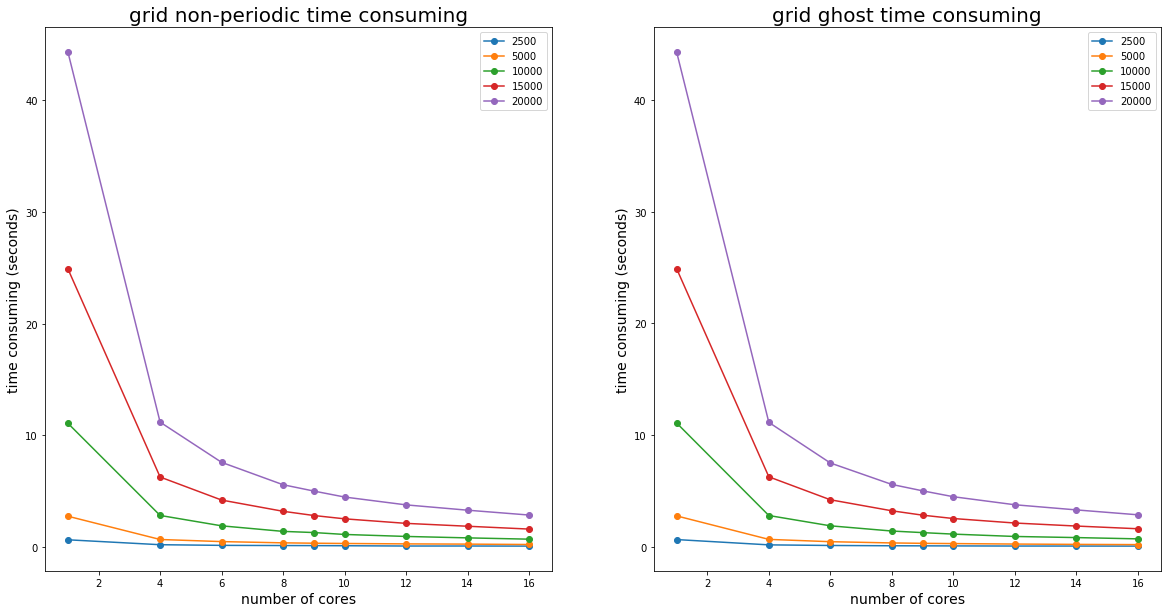

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

for i in range(5):
    axes[0].plot(core, non_periodic[i], 'o-',label=str(num[i]))
    axes[1].plot(core, ghost[i], 'o-', label=str(num[i]))

axes[0].set_title("grid non-periodic time consuming", fontsize = 20)
axes[0].set_xlabel("number of cores", fontsize = 14)
axes[0].set_ylabel("time consuming (seconds)", fontsize = 14)
axes[0].legend()
    
axes[1].set_title("grid ghost time consuming", fontsize = 20)
axes[1].set_xlabel("number of cores", fontsize = 14)
axes[1].set_ylabel("time consuming (seconds)", fontsize = 14)
axes[1].legend();


# Speedup Ratio

In [5]:
S_non = []
S_ghost = []

for i in range(5):
    S_n = non_periodic[i][0] / non_periodic[i]
    S_g = ghost[i][0] / ghost[i]
    
    S_non.append(S_n)
    S_ghost.append(S_g)

S_non, S_ghost

([array([1.        , 3.14334576, 4.37748237, 4.89919924, 5.16200863,
         5.65340695, 7.31443807, 7.17090469, 7.83665078]),
  array([ 1.        ,  4.09274183,  5.68678028,  7.38555143,  8.0955012 ,
          8.70964796,  9.86304865, 10.6587708 , 12.24783358]),
  array([ 1.        ,  3.92034765,  5.84408314,  7.92063441,  8.55682306,
          9.8500012 , 11.70995965, 13.5418382 , 15.77362933]),
  array([ 1.        ,  3.97427574,  5.92517452,  7.78854439,  8.82967616,
          9.86891272, 11.76368882, 13.38723318, 15.51295037]),
  array([ 1.        ,  3.96498722,  5.84723117,  7.94966922,  8.84834812,
          9.90585452, 11.75126957, 13.44531818, 15.48680357])],
 [array([ 1.        ,  3.95199821,  5.9610765 ,  7.92321988,  8.64652239,
          9.48701483, 11.31040131, 11.4366471 , 12.41688005]),
  array([ 1.        ,  4.22711585,  6.19617084,  8.25959873,  9.23766648,
          9.97114727, 11.80734393, 13.49372741, 14.98657269]),
  array([ 1.        ,  3.97098718,  5.93215962,  

In [6]:
E_non = S_non / core
E_ghost = S_ghost / core

E_non, E_ghost

(array([[1.        , 0.78583644, 0.72958039, 0.6123999 , 0.57355651,
         0.5653407 , 0.60953651, 0.51220748, 0.48979067],
        [1.        , 1.02318546, 0.94779671, 0.92319393, 0.89950013,
         0.8709648 , 0.82192072, 0.76134077, 0.7654896 ],
        [1.        , 0.98008691, 0.97401386, 0.9900793 , 0.95075812,
         0.98500012, 0.97582997, 0.96727416, 0.98585183],
        [1.        , 0.99356894, 0.98752909, 0.97356805, 0.98107513,
         0.98689127, 0.9803074 , 0.95623094, 0.9695594 ],
        [1.        , 0.9912468 , 0.97453853, 0.99370865, 0.98314979,
         0.99058545, 0.97927246, 0.96037987, 0.96792522]]),
 array([[1.        , 0.98799955, 0.99351275, 0.99040248, 0.96072471,
         0.94870148, 0.94253344, 0.81690336, 0.776055  ],
        [1.        , 1.05677896, 1.03269514, 1.03244984, 1.02640739,
         0.99711473, 0.98394533, 0.96383767, 0.93666079],
        [1.        , 0.99274679, 0.98869327, 0.98902553, 0.97803979,
         0.98588313, 1.01053   , 0.97236

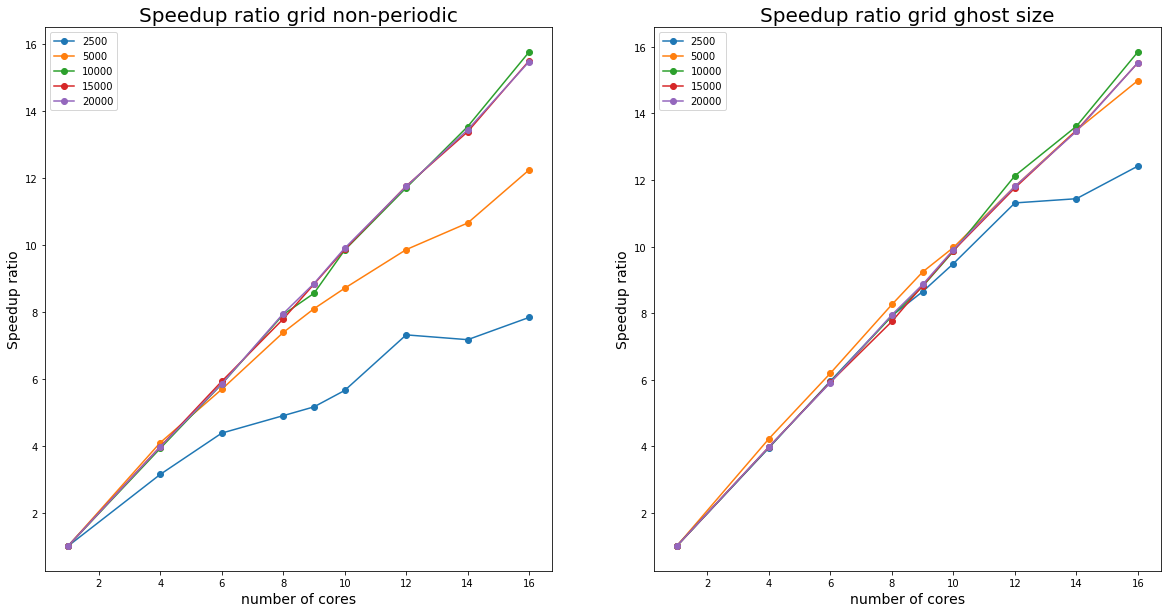

In [19]:
# fig, axes = plt.subplots(5,2, figsize=(20,50))

# for i in range(5):
#     axes[i][0].plot(core, S_non[i], 'o-', label=str(num[i]))
#     axes[i][0].set_title("Speedup grid non-periodic size : " + str(num[i]))
#     axes[i][0].set_xlabel("number of cores")
#     axes[i][0].set_ylabel("speedup ratio")
#     axes[i][0].legend()


    
#     axes[i][1].plot(core, S_ghost[i], 'o-', label=str(num[i]))
#     axes[i][1].set_title("Speedup grid ghost size : " + str(num[i]))
#     axes[i][1].set_xlabel("number of cores")
#     axes[i][1].set_ylabel("speedup ratio")
#     axes[i][1].legend()

fig, axes = plt.subplots(1, 2, figsize=(20,10))

for i in range(5):
    axes[0].plot(core, S_non[i], 'o-',label=str(num[i]))
    axes[1].plot(core, S_ghost[i], 'o-', label=str(num[i]))

axes[0].set_title("Speedup ratio grid non-periodic", fontsize = 20)
axes[0].set_xlabel("number of cores", fontsize = 14)
axes[0].set_ylabel("Speedup ratio", fontsize = 14)
axes[0].legend()
    
axes[1].set_xlabel("number of cores", fontsize = 14)
axes[1].set_ylabel("Speedup ratio", fontsize = 14)
axes[1].set_title("Speedup ratio grid ghost size", fontsize = 20)
axes[1].legend();


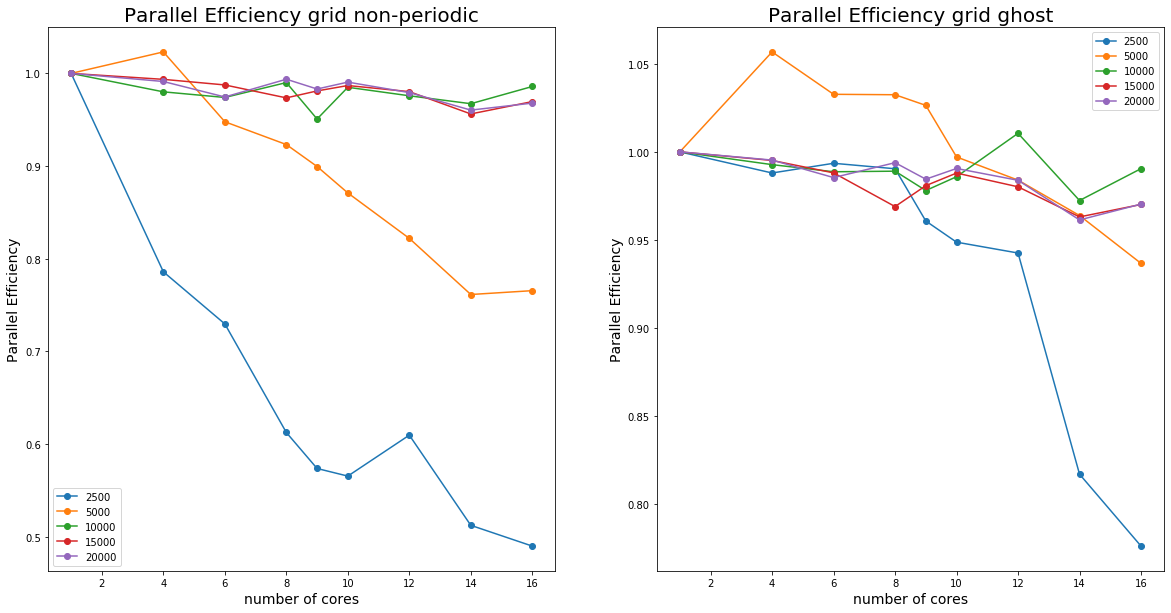

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

for i in range(5):
    axes[0].plot(core, E_non[i], 'o-',label=str(num[i]))
    axes[1].plot(core, E_ghost[i], 'o-', label=str(num[i]))


axes[0].set_xlabel("number of cores", fontsize = 14)
axes[0].set_ylabel("Parallel Efficiency", fontsize = 14)
axes[0].set_title("Parallel Efficiency grid non-periodic", fontsize = 20)
axes[0].legend()
    
axes[1].set_xlabel("number of cores", fontsize = 14)
axes[1].set_ylabel("Parallel Efficiency", fontsize = 14)
axes[1].set_title("Parallel Efficiency grid ghost", fontsize = 20)
axes[1].legend();